# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [ ]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf
import numpy as np
from matplotlib import pyplot as plt
import scipy

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xbrabl04.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xbrabl04.wav")

## 4. Úkoly

### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

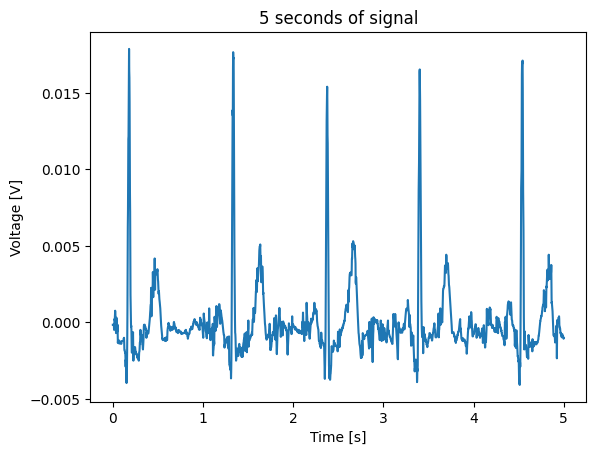

In [2]:
def show_5sec(x, fs):
    samples_5sec = int(5 * fs)
    x_5sec = x[:samples_5sec]
    time_5sec = np.linspace(0,5,samples_5sec)
    plt.plot(time_5sec, x_5sec)
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [V]")
    plt.title("5 seconds of signal")

    plt.show()

show_5sec(x, fs)

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

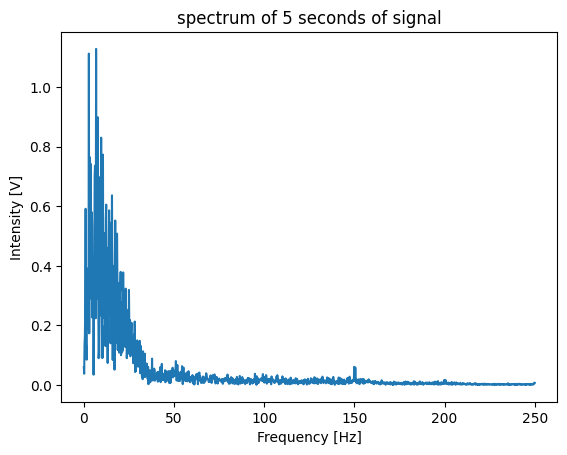

In [3]:
def show_spectrum_5sec(x, fs):
    samples_5sec = int(5 * fs)
    spectrum_size_5sec = int(samples_5sec / 2)
    x_5sec = x[:samples_5sec]
    spectrum_5sec = np.fft.fft(x_5sec)[:spectrum_size_5sec]
    frequencies = np.linspace(0, int(fs / 2), spectrum_size_5sec)
    plt.plot(frequencies, np.abs(spectrum_5sec))
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Intensity [V]")
    plt.title("spectrum of 5 seconds of signal")
    plt.show()

show_spectrum_5sec(x, fs)

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Electrical appliances powered from the grid (50Hz in this example) will often emit waves at this frequency, or its multiples (150 Hz is clearly visible in the spectrum). Also, power cables carrying alternating current from the socket will emit these waves too.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od `Fs/2` nebo použít filtr dolní propusti.

In [4]:
new_fs = 100

x_resampled = scipy.signal.decimate(x, int(fs/new_fs), ftype="fir") # uses low-pass FIR filter

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

Original signal



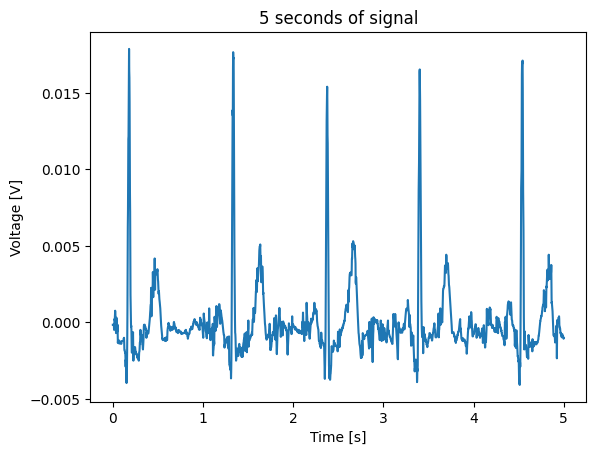

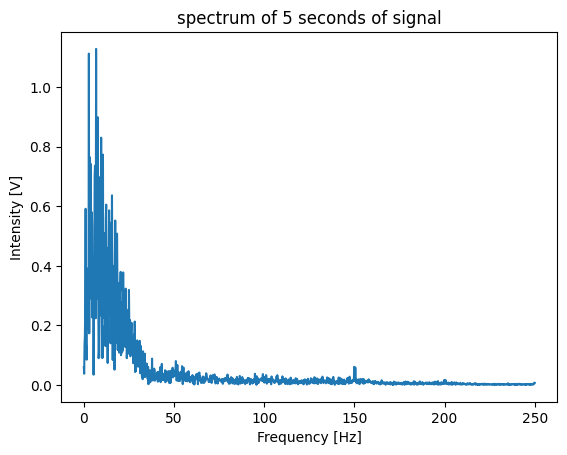


Resampled signal



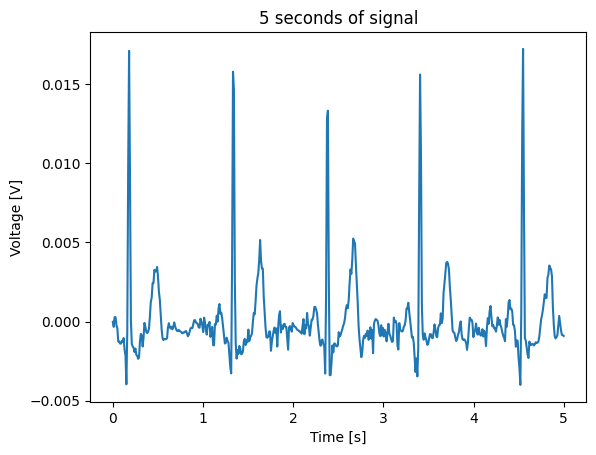

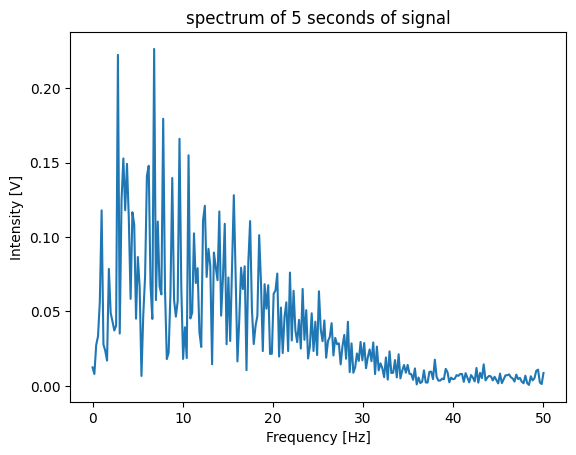

In [5]:
print("Original signal\n")
plt.title("5 seconds of input signal")
show_5sec(x, fs)
show_spectrum_5sec(x, fs)

print("")

print("Resampled signal\n")
plt.title("5 seconds of resampled signal")
show_5sec(x_resampled, new_fs)
show_spectrum_5sec(x_resampled, new_fs)

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

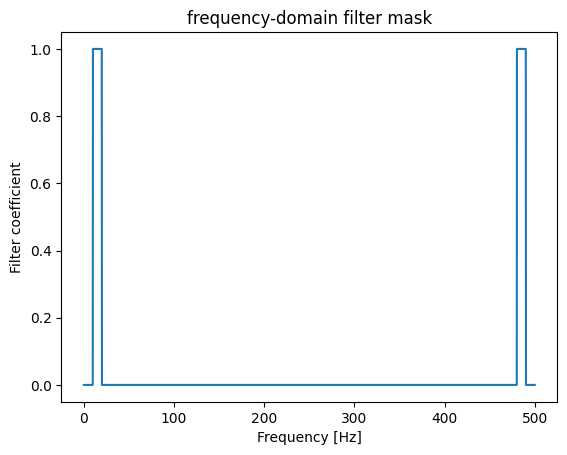

In [6]:
def make_filter(x, fs):
    # Frequency domain mask
    filter = np.ones(len(x))
    
    # low frequency bound
    low_bound = int(len(x) * 10 / fs) # 10 Hz
    filter[:low_bound] = 0
    filter[-(low_bound - 1):] = 0
    
    # High freqency bound
    high_bound = int(len(x) * 20 / fs) # 20 Hz
    filter[high_bound:-(high_bound - 1)] = 0

    return filter

filter = make_filter(x, fs)
frequencies = np.linspace(0, fs, len(filter))
plt.plot(frequencies, filter.real)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Filter coefficient")
plt.title("frequency-domain filter mask")
plt.show()

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


Original signal:



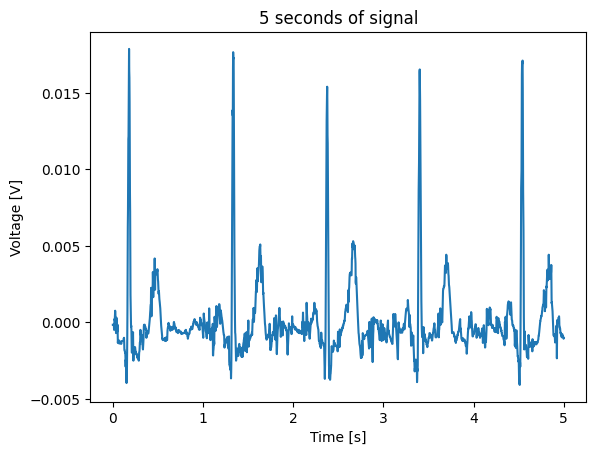

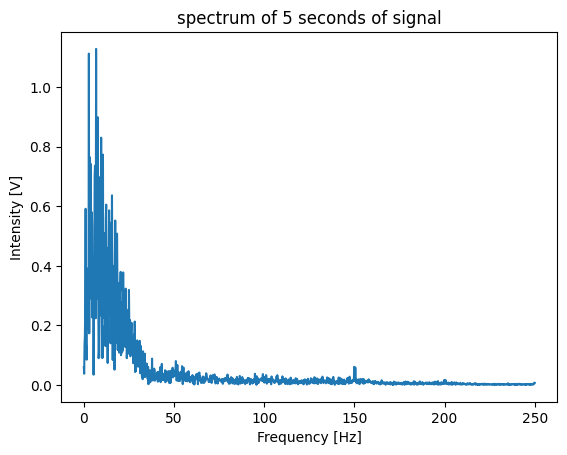


Filtered signal:



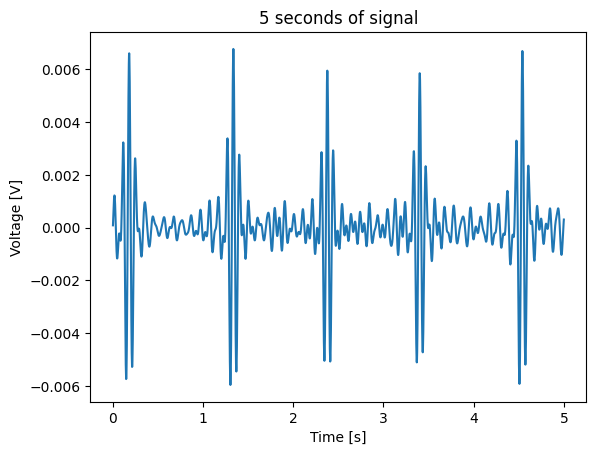

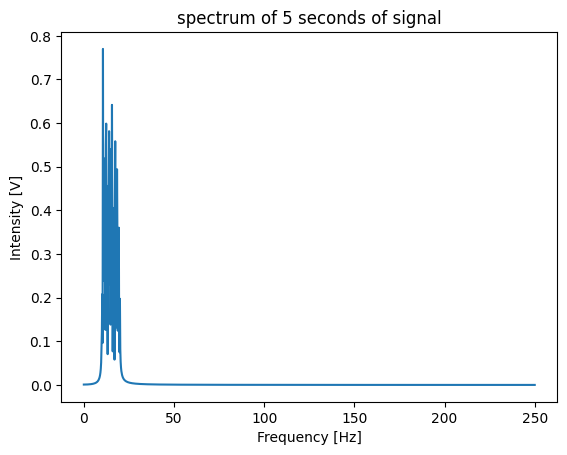

In [7]:
def apply_filter(x, fs):
    filter = make_filter(x, fs)
    spectrum = np.fft.fft(x) * filter
    return np.fft.ifft(spectrum).real

x_filtered = apply_filter(x, fs)

print("Original signal:\n")
show_5sec(x, fs)
show_spectrum_5sec(x, fs)

print("")

print("Filtered signal:\n")
show_5sec(x_filtered, fs)
show_spectrum_5sec(x_filtered, fs)

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



Filtered signal is now much more symmetrical, since it lost its low freqencies, which gave it the bias above zero, the R peak is also split into more peaks, since there are no high enough frequencies in the filtered signal to add up to a single high peak. The difference in spectra is obvious, in the filtered spectrum, only the part between 10 and 20 Hz remains, since this is what we didn't zero-out in frequency domain.

If we were filtering using a simple convolution FIR filter, we would get a maximum possible shift of `N - 1` samples, where `N` would be the length of the filter (number of nonzero coefficients). This could happen because output value is computed from not only the newest sample of the input signal, but also from the previous ones. A filter with all but the last coefficient equal to zero, eg. `[0,0,0,1]`, would simply delay the input signal by 3 samples, since it would take the 4th newest input sample and put it to output.

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

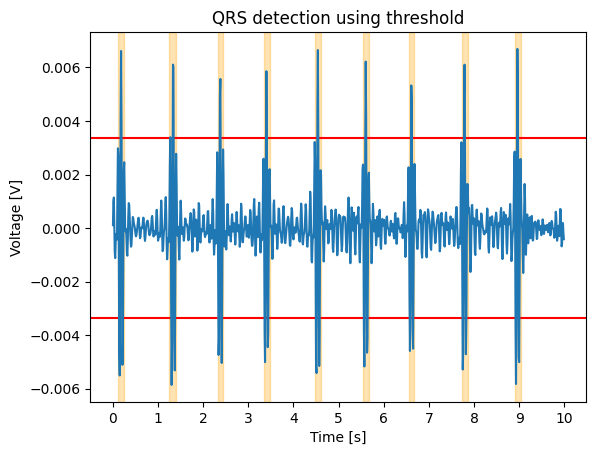

In [8]:
x_res_fil = apply_filter(x_resampled, new_fs)
xticks = (np.linspace(0, 1000, 11), np.arange(11))

# bias is for shifting the resulting pulse ranges, if needed
def find_threshold(x, threshold_ratio, show_pulse_ranges=True, show_limit_lines=True, bias=0):
    max_value = max(np.max(x), np.abs(np.min(x)))
    threshold = threshold_ratio * max_value
    
    if show_limit_lines:
        plt.axhline(y=threshold, color='red')
        plt.axhline(y=-threshold, color='red')
    
    qrs = np.copy(x)
    qrs[abs(qrs) < threshold] = 0
    qrs[qrs != 0] = 1

    # this basically takes all the ones found near each other, and merges them
    # into a single block of ones (the maximum distance of two ones is 4,
    # iterations=2 from both sides)
    qrs = scipy.ndimage.binary_dilation(qrs, iterations=2) # fill holes in pulses
    
    labeled_qrs, pulse_count = scipy.ndimage.label(qrs) # split to pulses
    
    pulses_ranges = scipy.ndimage.find_objects(labeled_qrs) # find bounds of pulses
    
    pulses = []
    for pulse in pulses_ranges:
        start = pulse[0].start
        stop = pulse[0].stop
        if show_pulse_ranges: plt.axvspan(start + bias, stop + bias, alpha=0.3, color="orange")
        pulses.append(np.argmax(x[start:stop]) + start + bias)
    
    # final output, contains the indeces of qrs pulses
    return np.array(pulses, dtype=int)
    
threshold_qrs = find_threshold(x_res_fil, 0.5)

plt.plot(x_res_fil)
plt.xticks(*xticks)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("QRS detection using threshold")
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

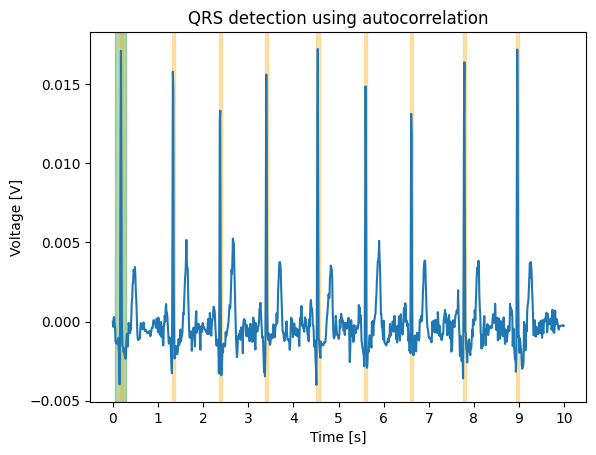

In [9]:
 # these three were found manually
sample_start = 5
sample_stop = 30
sample_peak = 13

single_qrs = x_resampled[sample_start:sample_stop]
plt.plot(x_resampled)

plt.axvspan(sample_start, sample_stop, alpha=0.3, color="green")

correlation = np.correlate(x_resampled, single_qrs)

autocorrelation_qrs = find_threshold(correlation, 
    0.5,
    # correlation window doesn't start at the peak, we must shift the maxima
    bias = sample_peak,
    show_limit_lines=False)

plt.xticks(*xticks)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("QRS detection using autocorrelation")
plt.show()

*Note: QRS complex used for autocorrelation is marked green*

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

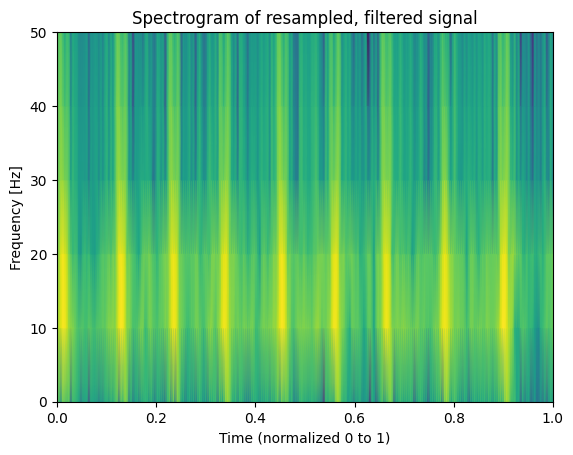

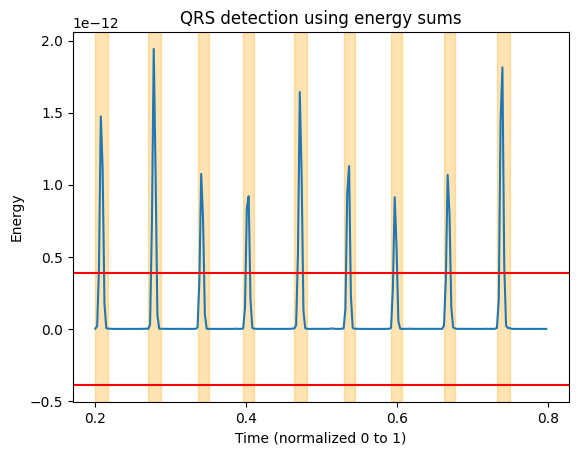

In [15]:
frequencies, times, spectrogram = scipy.signal.spectrogram(x_res_fil,
    new_fs,
    nperseg = int(0.1 * new_fs), # window_len
    noverlap = int(0.06* new_fs) # window_len - hop_size
)
plt.pcolormesh(np.linspace(0, 1, len(times)), 
    frequencies, 10 * np.log10(spectrogram), 
    shading='gouraud' # makes the spectrogram smoother
)

plt.xlabel("Time (normalized 0 to 1)")
plt.ylabel("Frequency [Hz]")
plt.title("Spectrogram of resampled, filtered signal")
spectrogram_xticks = plt.xticks()
plt.show()

energy_sums = (np.square(spectrogram)).sum(axis=0)
plt.plot(energy_sums)
spectrogram_qrs = find_threshold(energy_sums, 0.2)
spectrogram_qrs = np.array(times[spectrogram_qrs] * new_fs, dtype=int)

# reusing X axis labels from spectrogram
plt.xticks(np.linspace(0, 
    len(energy_sums), len(spectrogram_xticks[1]) - 2), 
    spectrogram_xticks[1][1:-1]
)
plt.xlabel("Time (normalized 0 to 1)")
plt.ylabel("Energy")
plt.title("QRS detection using energy sums")
plt.show()

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace. Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

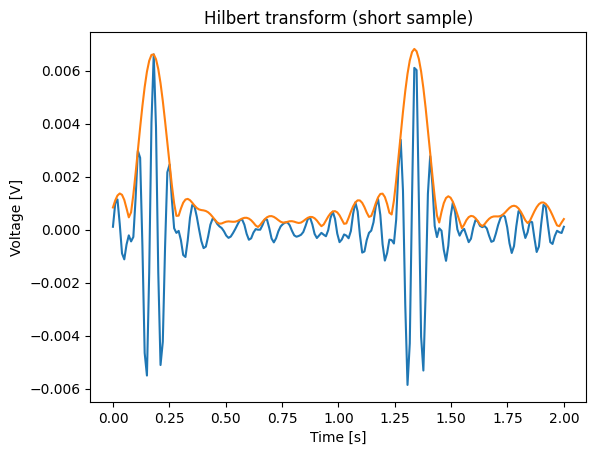

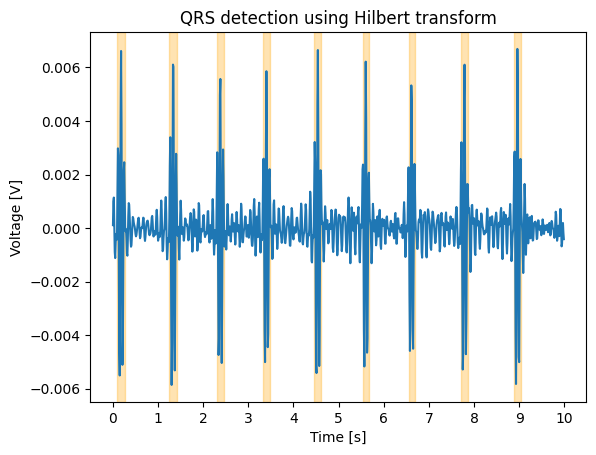

In [11]:
spectrum = np.fft.fft(x_res_fil)
size = len(spectrum)
assert(size % 2 == 0) # should be even

spectrum[int(size / 2 + 1):] = 0
spectrum[1:int(size / 2)] *= 2
x_hilbert = np.abs(np.fft.ifft(spectrum))

showcase_size = 200
showcase_time = np.linspace(0, 200 / new_fs, showcase_size)
plt.plot(showcase_time, x_res_fil[:showcase_size])
plt.plot(showcase_time, x_hilbert[:showcase_size])
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Hilbert transform (short sample)")
plt.show()

plt.plot(x_res_fil)
hilbert_qrs = find_threshold(x_hilbert, 0.5, show_limit_lines=False)
plt.xticks(*xticks)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("QRS detection using Hilbert transform")
plt.show()

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

- In case of threshold detection, flipped signal won't affect the result, since we're using the threshold with both positive and negative sign.
- In autocorrelation, this would be a problem, since a flipped pulse would have a negative correlation in the signal, and we're checking for high positive correlation.
- In spectrogram detection, we would get the same sums of energy bins, no matter how the signal is oriented, and therefore we would get correct results.
- When detecting peaks using Hilbert transform, we would get wrong results, since the highest peak would be on the opposite side (this wouldn't be as bad if we were working with the filtered signal, where the peak is more symmetrical).

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

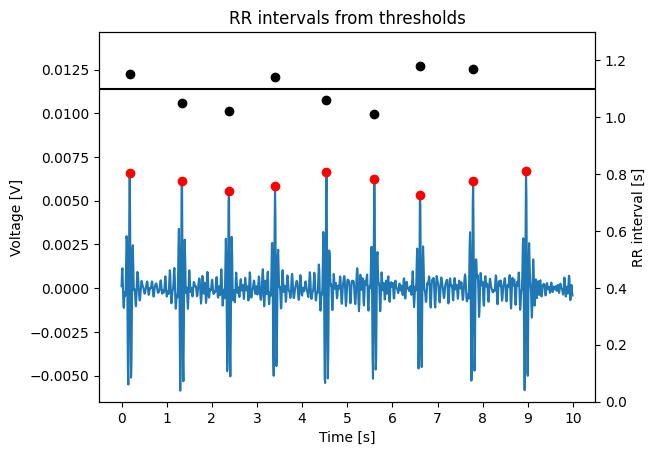

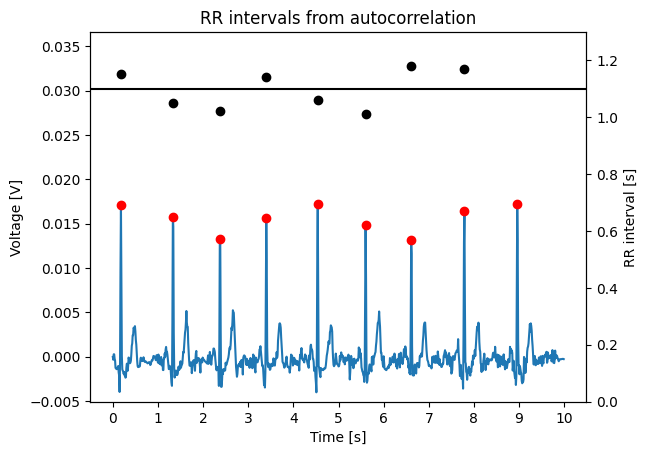

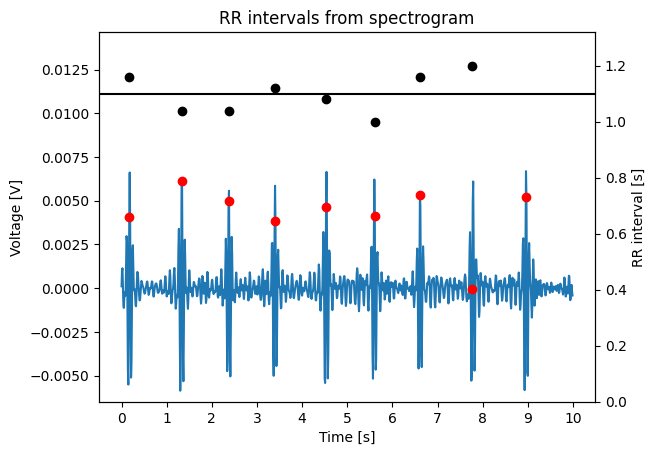

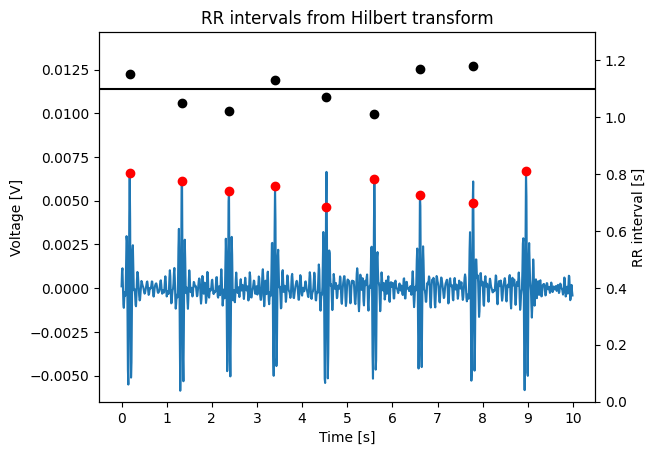

In [12]:
yticks = (np.linspace(0, 120, 12), np.arange(12) / 10)

def draw_rr(x, qrs, desc):
    fig, ax1 = plt.subplots()
    
    ax1.plot(x)
    
    ax1.scatter(qrs,x[qrs],color='red', marker='o', zorder=2)
    low, high = ax1.get_ylim()
    ax1.set_ylim(low, high * 2)

    ax2 = ax1.twinx()
    rr_intervals = np.abs(np.diff(qrs)) / new_fs
    mean = np.mean(rr_intervals)
    plt.axhline(y=mean, color="black")

    #ax2.set_yticks(*yticks)
    
    ax2.scatter(qrs[:-1], rr_intervals, color='black', marker='o', zorder=3)
    ax2.set_ylim(0, np.max(rr_intervals) * 1.1)

    plt.xticks(*xticks)
    plt.title(desc)
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel("Voltage [V]")
    ax2.set_ylabel("RR interval [s]")

    plt.show()


draw_rr(x_res_fil, threshold_qrs, "RR intervals from thresholds")
draw_rr(x_resampled, autocorrelation_qrs, "RR intervals from autocorrelation")
draw_rr(x_res_fil, spectrogram_qrs, "RR intervals from spectrogram")
draw_rr(x_res_fil, hilbert_qrs, "RR intervals from Hilbert transform")

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

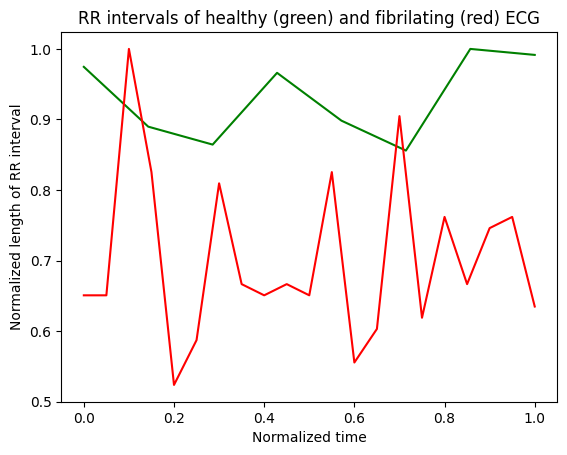

In [13]:
fib, fib_fs = sf.read("FIB.wav")
fib_resampled = scipy.signal.decimate(fib, int(fib_fs/new_fs))
fib_res_fil = apply_filter(fib_resampled, new_fs)

# using the basic threshold method
fib_qrs = find_threshold(fib_res_fil, 0.5, show_limit_lines=False, show_pulse_ranges=False)

x_rr = np.abs(np.diff(threshold_qrs))
plt.plot(np.linspace(0, 1, len(x_rr)), x_rr / np.max(x_rr), color="green")

fib_rr = np.abs(np.diff(fib_qrs))
plt.plot(np.linspace(0, 1, len(fib_rr)), fib_rr / np.max(fib_rr), color="red")

plt.title("RR intervals of healthy (green) and fibrilating (red) ECG")
plt.xlabel("Normalized time")
plt.ylabel("Normalized length of RR interval")
plt.show()

I used the basic threshold detection on resampled and filtered signals. Then calculated their RR intervals, and normalized them. As you can see, the healthy RR intervals vary just around 10% of their length. The fibrilating RR intervals vary in circa 50% of their length.

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

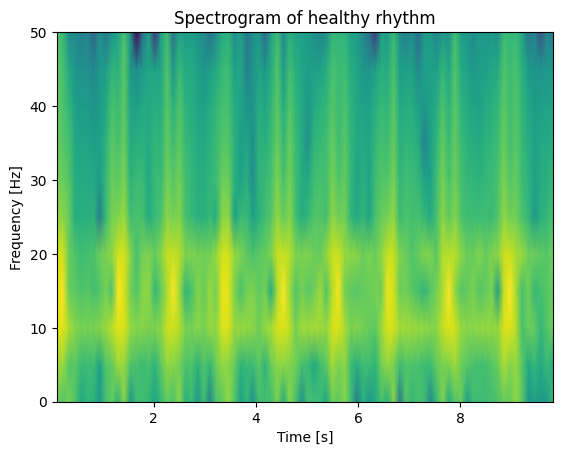

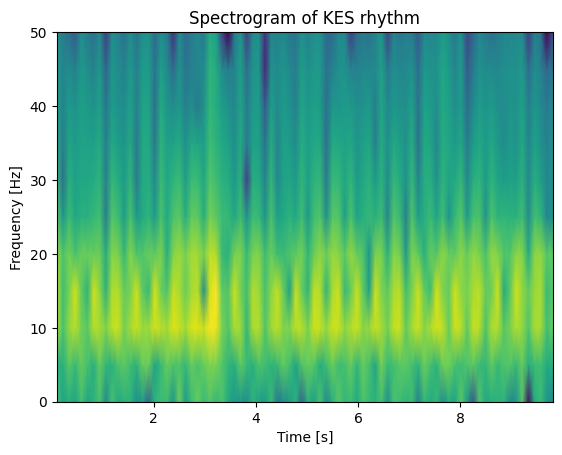

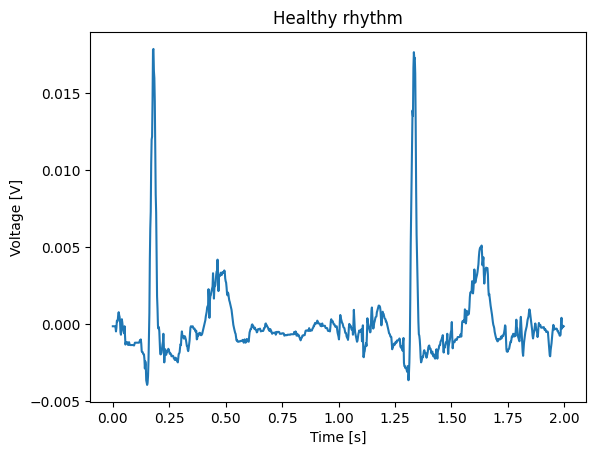

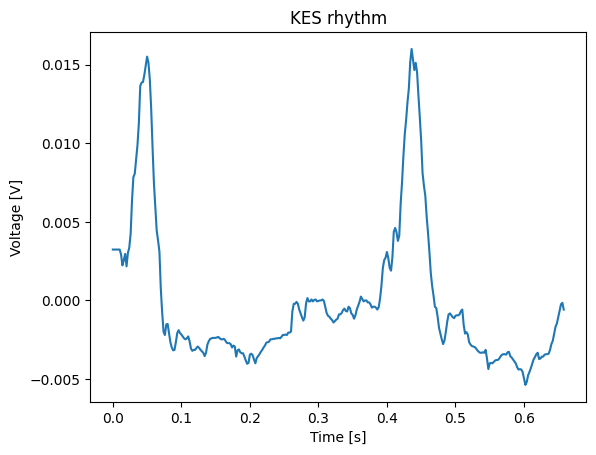

In [14]:
kes, kes_fs = sf.read("KES.wav")
kes_resampled = scipy.signal.decimate(kes, int(kes_fs/new_fs))
kes_res_fil = apply_filter(kes_resampled, new_fs)

def show_spectrogram(x, fs, desc):
    frequencies, times, spectrogram = scipy.signal.spectrogram(x,
        fs,
        nperseg = int(0.2 * new_fs), # window_len
        noverlap = int(0.08* new_fs) # window_len - hop_size
    )
    
    plt.pcolormesh(times, 
        frequencies, 10 * np.log10(spectrogram), 
        shading='gouraud' # makes the spectrogram smoother
    )

    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [Hz]")
    plt.title(desc)
    plt.show()

show_spectrogram(x_res_fil, new_fs, "Spectrogram of healthy rhythm")
show_spectrogram(kes_res_fil, new_fs, "Spectrogram of KES rhythm")

def show_part(x, fs, samples, desc):
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [V]")
    plt.title(desc)
    plt.plot(np.arange(samples) / fs, x[:samples])
    plt.show()


show_part(x, fs, 1000, "Healthy rhythm")
show_part(kes, kes_fs, 330, "KES rhythm")

The difference in spectra is not that well visible, I tried to change the window and step sizes, but it didn't help. The difference in the raw signal is visible well, though. I rescaled the healthy signal to match the RR interval of KES signal, and the QRS complex is noticeably wider than in the original signal. Note that this is the original signal, so this wasn't caused by any resampling or filtering.